# Graph Powered Machine Learning - Exercise 1

Full Name: Shreyas Srinivasa

Student Affiliation: AAU

Email Address: shsr@es.aau.dk

# 1.1  Create an RDF Graph representing the same road network and traveltimes

In [ ]:
%%capture
!pip3 install rdflib

In [ ]:
import rdflib
from rdflib import Graph
from rdflib.namespace import DC, RDF, FOAF, RDFS
from rdflib import URIRef, BNode, Literal

In [ ]:


g = Graph()


# Graph using N3 syntax
n3data = """\
@prefix : <http://www.snee.com/ns/Railnetwork#> .
:Inverness :hasConnection :Aberdeen ;
           :distance      :3 . 
:Aberdeen :hasConnection :Inverness ;
      :distance    :2.5 .
:Aberdeen :hasConnection :Leuchars ;
           :distance    :1.5 .
:Leuchars :hasConnection :Aberdeen ;
           :distance    :1 .
:Leuchars :hasConnection :Edinburgh ;
           :distance    :1.5 .
:Edinburgh :hasConnection :Leuchars ;
           :distance    :3 .
:Edinburgh :hasConnection :Glasgow  ;
           :distance    :1  .
:Glasgow :hasConnection  :Edinburgh  ;
           :distance    :1  .
:Edinburgh :hasConnection :York  ;
           :distance    :3.5  .
:York     :hasConnection :Edinburgh  ;
           :distance    :4  .
:Glasgow  :hasConnection :Carlisle   ;
           :distance    :1  .
:Carlisle :hasConnection :Glasgow  ;
           :distance    :1  .
:Carlisle :hasConnection :York  ;
           :distance    :2.5  .
:York     :hasConnection :Carlisle   ;
           :distance    :3.5  .
:Birmingham :hasConnection :London  ;
           :distance    :1.5  .
:London   :hasConnection :Birmingham ;
           :distance    :2.5 .
:Leuchars :hasConnection :StAndrews ;
           :distance      :0.2 . 
:StAndrews :hasConnection :Leuchars ;
      :distance    :0.2 .
:York :hasConnection :London ;
           :distance    :1.8 .
:London :hasConnection :York ;
           :distance    :2 .
:London	:hasConnection :Brussels ;
			     :distance	  :2.50 .
:Brussels :hasConnection :London ;
			    :distance	:3.5  .	
:Brussels :hasConnection :Cologne ;
           :distance    :2 .
:Cologne :hasConnection :Brussels ;
           :distance    :1.5 .
:Toronto :hasConnection :Winnipeg  ;
           :distance    :36  .
:Winnipeg :hasConnection  :Toronto  ;
           :distance    :35  .
:Winnipeg :hasConnection :Saskatoon  ;
           :distance    :12  .
:Saskatoon :hasConnection :Winnipeg  ;
           :distance    :5  .
:Saskatoon :hasConnection :Edmonton  ;
           :distance    :12  .
:Edmonton :hasConnection :Saskatoon  ;
           :distance    :17  .
:Edmonton :hasConnection :Jasper  ;
           :distance    :6  .
:Jasper :hasConnection :Edmonton  ;
           :distance    :5  .
:Jasper :hasConnection :Vancouver  ;
           :distance    :12  .
:Vancouver :hasConnection :Jasper  ;
           :distance    :13  ."""
g.parse(data=n3data, format="n3")
#print all triples
for s, p, o in g:
   print((s, p, o))

another way

In [ ]:
g = Graph()

#defining the distance as edge word
distance = rdflib.URIRef('http://www.example.org/distance')

cities = [
    "Inverness",
    "Aberdeen",
    "Leuchars",
    "StAndrews",
    "Edinburgh",
    "Glasgow",
    "York",
    "Cologne",
    "Carlisle",
    "Birmingham",
    "London",
    "Brussels",
    "Toronto",
    "Winnipeg",
    "Saskatoon",
    "Edmonton",
    "Jasper",
    "Vancouver"
  ];



for city in cities:
  urirefs = "http://www.example.org/"+city
  print(urirefs)
  city = rdflib.URIRef('http://www.example.org/'+city)







# 1.2 Implement a SPARQL query returning all cities which can be reached from London.

In [ ]:
result = g.query(
    """SELECT DISTINCT  ?o
WHERE {
  :London :hasConnection ?o .
}
""")
for row in result:
  #print("%s has connection with %s" % row)
   print(row)

# 1.3 Implement generic python code (i.e., the algorithms don't have to be specied in SPARQL, but could be) for the Single Source Shortest Path algorithm and return the shortest paths to all other cities starting from London. You can choose either Dijkstra's or Bellman-Ford's algorithm.

In [ ]:
result = g.query(
    """SELECT DISTINCT  ?o
WHERE {
  :London :hasConnection ?o .
}
""")
for row in result:
  #print("%s has connection with %s" % row)
   print(row)

# 2.0 Pagerank
For a given directed networkx Graph (e.g., G = nx.DiGraph(nx.path graph(4))  write a PageRank algorithm using python from scratch (i.e., don't use nx.pagerank()).
Your PageRank algorithm should consider a parameter alpha, representing
the damping factor and return a dictionary of nodes with their PageRank as
value.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csc_matrix

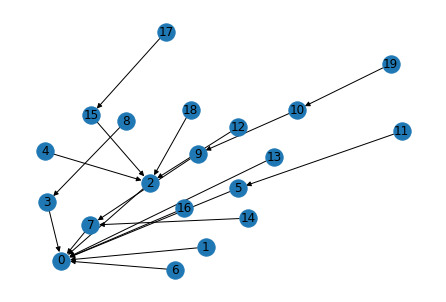

{0: 0.3299532214939014, 1: 0.021522999010540892, 2: 0.11025182723885542, 3: 0.039817646775049974, 4: 0.021522999010540892, 5: 0.03981764677504997, 6: 0.021522999010540892, 7: 0.08688049209522487, 8: 0.021522999010540892, 9: 0.0553678839453282, 10: 0.03981764677504997, 11: 0.021522999010540892, 12: 0.021522999010540892, 13: 0.021522999010540892, 14: 0.021522999010540892, 15: 0.03981764677504997, 16: 0.021522999010540892, 17: 0.021522999010540892, 18: 0.021522999010540892, 19: 0.021522999010540892}


In [9]:
def pageRank(G, alpha = .85, maxerr = .0001):

    
    """
    Computes the pagerank for each of the n states
    Parameters
    ----------
    G: matrix representing state transitions
    alpha: damping factor 
    maxerr: if the sum of pageranks between iterations is below this we will
            have converged.
    """

   
    #Constructing a numpy array from the graph and shaping it
    G = nx.to_numpy_matrix(G)
    n = G.shape[0]

    # transform G into markov matrix M
    M = csc_matrix(G,dtype=np.float)
    rsums = np.array(M.sum(1))[:,0]
    ri, ci = M.nonzero()
    M.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0

    # Compute pagerank "r" until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(0,n):
            # inlinks of state i
            Mi = np.array(M[:,i].todense())[:,0]
            # Account for sink states
            Di = sink / float(n)
            # Account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Mi*alpha + Di*alpha + Ei*(1-alpha) )

    # return normalized pagerank
    return r/float(sum(r))
    

if __name__ == '__main__':
    
    
    """
    Generating a random directed graph G
    """
    
    # setting the number of nodes
    nodes = 20
    
    #G = nx.gn_graph(nodes)
    G = nx.gnr_graph(nodes, 0.5)
   
    nx.draw(G, with_labels = True)
    plt.show()
    
    
    
    """
    computing pagerank
    """
    score = pageRank(G, 0.85, .0001)
     
    rank = {}
    
    
    
    for i in range(0,nodes):
         rank[i] = score[i]
    
    print(rank)